This problem was adapted from Professor Farimani's paper. If you are interested in learning more, you can read it <a href="https://www.nature.com/articles/s41699-018-0060-8.pdf">here</a>.

In [1]:
# (a)
# data preprocessing
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

with open('q1-data\\data.csv') as file:
    csv_reader = csv.reader(file, delimiter=',')
    a=[]
    for row in csv_reader:
        a.append(row)
    x=np.asarray(a)
    x=np.transpose(x[1:,:])
    
    x1=x[0::2]
    x1=x1.flatten()
    x1=x1.astype(np.float)
    x2=x[1::2]
    x2=x2.flatten()
    x2=x2.astype(np.float)
    X=np.column_stack((x1,x2))
    
    Y=np.array([])
    for i in range(20):
        xn=np.full((100,1), i)
        Y=np.append(Y,xn)

    
    print(X.shape)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.70, test_size=0.30, random_state=20)
    #plt.scatter(X[:, 0], X[:, 1])

(2000, 2)


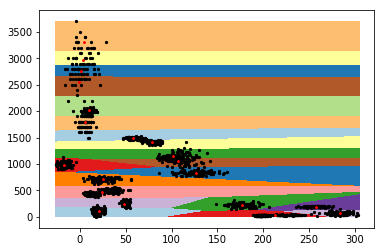

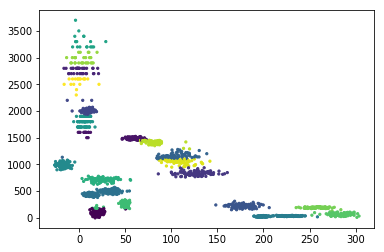

In [2]:
# (b)
# k-means
#training and predicting model
from sklearn.cluster import KMeans
model = KMeans(n_clusters=20, random_state=20)
model.fit(X)
label = model.predict(X)

plt.figure(1)
#plt.figure(figsize=(10,10))
h = 1    
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(X[:, 0], X[:, 1], c='k', s=5)
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],s=5, c='r',marker='*', )



plt.figure(2)
#plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=label,s=5, cmap='viridis')

#The decision boundary in the first image helps us predict the class to which an unknown data 
#point belongs. Cluster means give a good representation of data distribution.

The accuracy from KNN is: 97.5 %


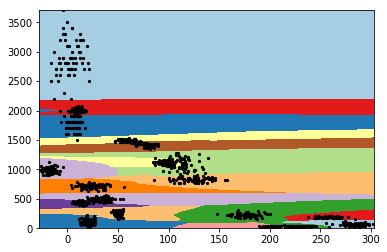

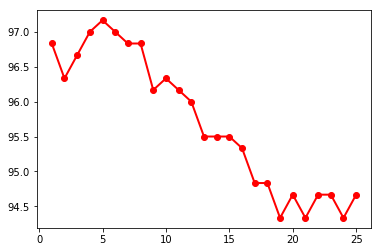

In [3]:
# (c)
# knn
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, Y_train) 
label_train=model.predict(X_train)

#accuracy of training set

accuracy=model.score(X_train, Y_train)
print('The accuracy from KNN is:',accuracy*100,'%')
plt.figure(1)
#plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c='k', s=5)

h = 1    
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
x=[]
acc=[]

for i in range(1,26):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, Y_train) 
    label_train=model.predict(X_train)
    label_test=model.predict(X_test)
    accuracy=model.score(X_test, Y_test)
    accuracy=accuracy*100
    acc.append(accuracy)
    x.append(i)
plt.figure(2)
#plt.figure(figsize=(10,5))
plt.plot(x, acc, linewidth=2, color='r', marker='o')


The accuracy from random forest is: 97.33333333333334 %


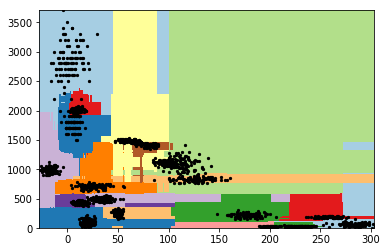

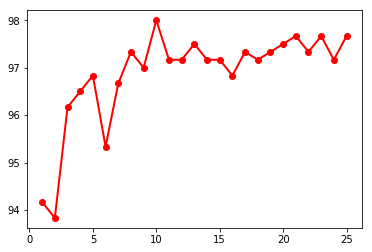

In [4]:
# (d)
# random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, Y_train) 
label_train=model.predict(X_train)

label_test = model.predict(X_test)
accuracy = accuracy_score(Y_test, label_test)
print('The accuracy from random forest is:',accuracy*100,'%')

plt.figure(1)
#plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c='k', s=5)

h = 1    
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
x=[]
acc=[]

for i in range(1,26):
    model = RandomForestClassifier(n_estimators=i)
    model.fit(X_train, Y_train) 
    label_train=model.predict(X_train)
    label_test=model.predict(X_test)
    accuracy=model.score(X_test, Y_test)
    accuracy=accuracy*100
    acc.append(accuracy)
    x.append(i)
plt.figure(2)
#plt.figure(figsize=(10,5))
plt.plot(x, acc, linewidth=2, color='r', marker='o')


The accuracy is: 81.92857142857143 %


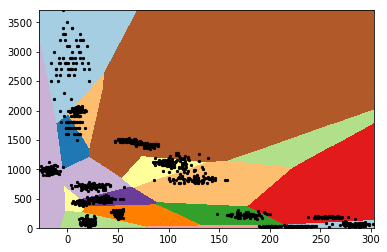

In [5]:
# (e)
# Logistic Regression
from sklearn.linear_model import LogisticRegression


model=LogisticRegression()#random_state=0, solver='sag',multi_class='multinomial', max_iter=5000)
model.fit(X_train, Y_train)
label=model.predict(X_train)
accuracy=model.score(X_train, Y_train)
print('The accuracy is:',accuracy*100,'%')

plt.figure(1)
#plt.figure(figsize=(10,10))
plt.scatter(X_train[:, 0], X_train[:, 1], c='k', s=5)

h = 1    
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',extent=(xx.min(), xx.max(), yy.min(), yy.max()),cmap=plt.cm.Paired,aspect='auto', origin='lower')
#plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
# Write your code here

(f)
K means:high speed, number of clusters has to be predetermined and not data-dependent, loss function:within square distance from mean

KNN:predictive test accuracy is lower than training data accuracy, high training speed, predictive speed depends on number of neighbours, memory intensive. Decision boundary is arbitarily complicated, better performance with larger dataset,  loss function is 0 or 1, discriminative algorithm, increase k to reduce complexity

Logistic regression: accuracy is low, high training and predictive speed, decision boundary is linear, parameter estimation done using gradient descent of loss, good performance with small dataset, performs badly with multiple non linear classifications, , loss function is − log P(Y |X), discriminative algorithm, l2 regularization reduces overfitting

Random Forest:training accuracy is higher than test accuracy, slow training speed, moderate test speed, robust to outliers, parameter tuning needed, decision boundary is arbitarily complicated, better performance with larger datasets, use ensembles to reduce overfitting
    
